<a href="https://colab.research.google.com/github/stiflerGit/CAD-Mammography/blob/master/PT_CNN_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive')

work_dir = "./drive/My Drive/PT-CNN/"
if not os.path.exists(work_dir):
  os.makedirs(work_dir)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

train_gray_imgs = np.load("/content/drive/My Drive/CI_FinalProject/Copia di train_img_224.npy")
train_lbls = np.load("drive/My Drive/CI_FinalProject/Copia di train_lab.npy")

val_split = 0.2
X_train, X_val, y_train, y_val = train_test_split(train_gray_imgs, train_lbls,
                                                  test_size=val_split, 
                                                  stratify=train_lbls)

X = np.concatenate((X_train, X_val))
y = np.concatenate((y_train, y_val))
del(X_train, X_val)
del(y_train, y_val)


X = np.stack((X,)*3, axis=-1)

del(train_gray_imgs)
del(train_lbls)

test_gray_imgs = np.load("drive/My Drive/CI_FinalProject/Copia di public_test_image_224.npy")
test_rgb_imgs = np.stack((test_gray_imgs,)*3, axis=-1)
test_lbls = np.load("drive/My Drive/CI_FinalProject/Copia di public_test_label.npy")

del(test_gray_imgs)

print(X.shape) # 2864 images: it is a small data set
print(X.dtype)


(2864, 224, 224, 3)
uint16


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./65536, horizontal_flip=True, vertical_flip=True, validation_split=val_split)

train_iterator = train_datagen.flow(X, y, batch_size=64, subset='training')

validation_iterator = train_datagen.flow(X, y, batch_size=16, subset='validation')
# # validation_iterator = train_datagen.flow(train_rgb_imgs, train_lbls, batch_size=16, subset='validation')

test_datagen = ImageDataGenerator(rescale=1./65536, horizontal_flip=True, vertical_flip=True)

test_iterator = test_datagen.flow(test_rgb_imgs, test_lbls, batch_size=8)

Using TensorFlow backend.


In [0]:
from keras.applications import VGG16
from keras import Sequential, Model
from keras import layers

vgg16 = VGG16(weights='imagenet', include_top = False, input_shape=(224,224,3))

model = Sequential()
for layer in vgg16.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  model.add(layer)
  
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

58892288/58889256 [==============================] - 2s 0us/step
[<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>]
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 

In [0]:
history = model.fit_generator(train_iterator, steps_per_epoch=35, epochs=50,
                              validation_data=validation_iterator,
                              validation_steps=35)

Epoch 1/50
35/35 [==============================] - 36s 1s/step - loss: 2.8200 - acc: 0.7384 - val_loss: 1.7244 - val_acc: 0.8107
Epoch 2/50
35/35 [==============================] - 31s 884ms/step - loss: 1.6716 - acc: 0.8090 - val_loss: 1.6452 - val_acc: 0.7914
Epoch 3/50
35/35 [==============================] - 26s 731ms/step - loss: 1.4617 - acc: 0.8209 - val_loss: 1.3047 - val_acc: 0.8345
Epoch 4/50
35/35 [==============================] - 26s 734ms/step - loss: 1.2966 - acc: 0.8436 - val_loss: 1.1743 - val_acc: 0.8417
Epoch 5/50
35/35 [==============================] - 26s 735ms/step - loss: 1.0723 - acc: 0.8577 - val_loss: 1.6953 - val_acc: 0.7356
Epoch 6/50
35/35 [==============================] - 26s 739ms/step - loss: 1.0251 - acc: 0.8596 - val_loss: 1.2339 - val_acc: 0.8076
Epoch 7/50
35/35 [==============================] - 26s 741ms/step - loss: 0.8632 - acc: 0.8682 - val_loss: 0.8802 - val_acc: 0.8615
Epoch 8/50
35/35 [==============================] - 26s 741ms/step - los

In [0]:
model.save(os.path.join(work_dir, "IntermediateLayers04.h5"))

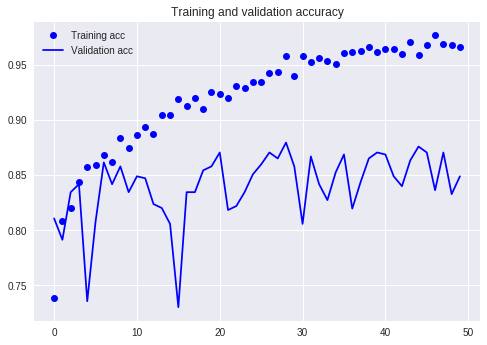

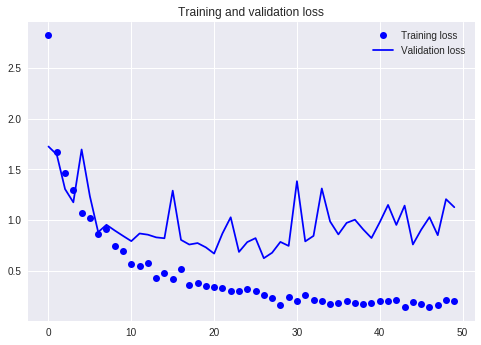

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

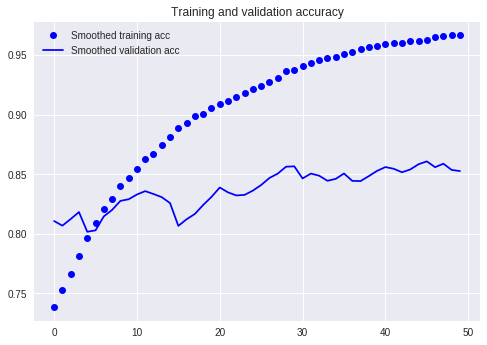

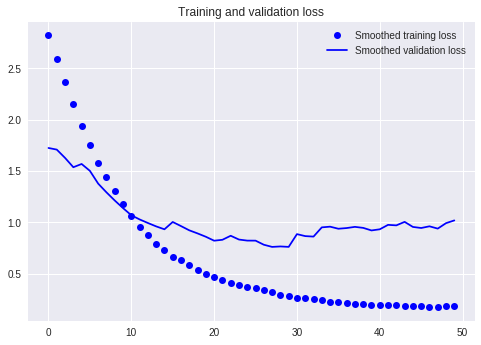

In [0]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
results = model.evaluate_generator(test_iterator, steps=45, verbose=1)

print("test_loss: ", results[0], " test_acc: ", results[1])

20/45 [============>.................] - ETA: 4s